# Информация о группах
Этот блок содержит основную информацию о выбранных группах: название, количество подписчиков и описание.
          id                name  members_count  \
0    2677092        STALCRAFT: X         187887   
1  202314449     STALCRAFT MEDIA          80841   
2   78009787  FUNCKA | STALCRAFT          31625   

                                         description  
0  STALCRAFT: X — это самая масштабная онлайн-игр...  
1                           Всё, что связано с игрой  
2  Тут — фан-сообщество по игре «STALCRAFT».\n\nН...  

---

# Данные о постах
Этот блок содержит информацию о постах в группах: текст поста, количество лайков, репостов и комментариев.
   group_id                                               text  likes_count  \
0   2677092  📸 Конкурс скриншотов: Запечатлейте Зону — объя...           46   
1   2677092  📸 Конкурс скриншотов: Запечатлейте Зону    У к...          161   
2   2677092  🚧 Технические работы на сайте [#alias|support....          119   


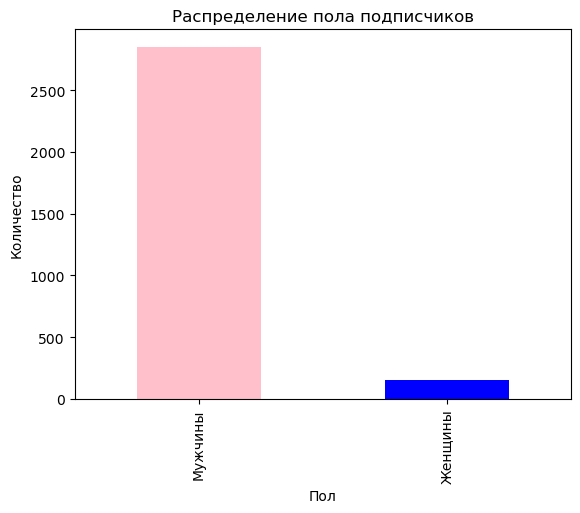


---

# Топ городов подписчиков
Этот блок показывает топ городов, в которых живут подписчики.
city
Не указано         628
Москва             546
Санкт-Петербург    398
Новосибирск         49
Екатеринбург        41
Самара              34
Красноярск          32
Краснодар           26
Ростов-на-Дону      26
Минск               25
Name: count, dtype: int64


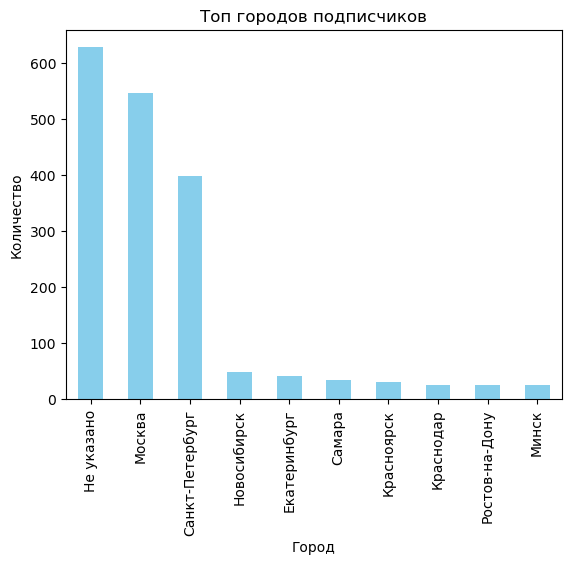


---

# Средняя активность на пост
Этот блок показывает среднее количество лайков, репостов и комментариев на пост в каждой группе.
           likes_count  reposts_count  comments_count
group_id                                             
2677092         374.55         148.14          245.16
78009787          5.91           1.26           10.95
202314449       473.61         236.48          114.93


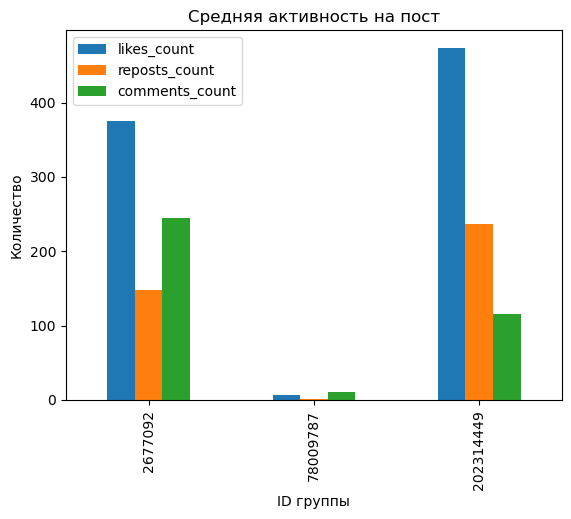


---



In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Чтение токена из файла token.txt
with open('token.txt', 'r') as file:
    access_token = file.read().strip()  # Удаляем лишние пробелы и символы

# Версия API ВКонтакте
version = '5.131'

# ID групп
group_ids = [2677092, 202314449, 78009787]

# Функция для получения информации о группе
def get_group_info(group_id):
    url = 'https://api.vk.com/method/groups.getById'
    params = {
        'access_token': access_token,
        'v': version,
        'group_id': group_id,
        'fields': 'members_count,description'
    }
    response = requests.get(url, params=params).json()
    
    # Проверка наличия ключа 'response'
    if 'response' not in response:
        print(f"Ошибка при запросе информации о группе {group_id}: {response}")
        return None
    
    return response['response'][0]

# Функция для получения постов группы
def get_group_posts(group_id, count=100):
    url = 'https://api.vk.com/method/wall.get'
    params = {
        'access_token': access_token,
        'v': version,
        'owner_id': f'-{group_id}',
        'count': count
    }
    response = requests.get(url, params=params).json()
    
    # Проверка наличия ключа 'response'
    if 'response' not in response:
        print(f"Ошибка при запросе постов группы {group_id}: {response}")
        return []
    
    return response['response']['items']

# Функция для получения подписчиков группы
def get_group_members(group_id, count=1000):
    url = 'https://api.vk.com/method/groups.getMembers'
    params = {
        'access_token': access_token,
        'v': version,
        'group_id': group_id,
        'count': count,
        'fields': 'sex,bdate,city'
    }
    response = requests.get(url, params=params).json()
    
    # Проверка наличия ключа 'response'
    if 'response' not in response:
        print(f"Ошибка при запросе подписчиков группы {group_id}: {response}")
        return []
    
    return response['response']['items']

# Сбор данных о группах
groups_info = []
for group_id in group_ids:
    group_data = get_group_info(group_id)
    if group_data:  # Добавляем только если данные получены
        groups_info.append(group_data)

# Преобразование в DataFrame
if groups_info:  # Проверяем, что данные есть
    groups_df = pd.DataFrame(groups_info)
    
    # Вывод информации о группах
    print("# Информация о группах")
    print("Этот блок содержит основную информацию о выбранных группах: название, количество подписчиков и описание.")
    print(groups_df[['id', 'name', 'members_count', 'description']])
    print("\n---\n")  # Разделитель
else:
    print("Не удалось получить данные о группах.")

# Сбор данных о постах
all_posts = []
for group_id in group_ids:
    posts = get_group_posts(group_id)
    for post in posts:
        post['group_id'] = group_id
        all_posts.append(post)

# Преобразование в DataFrame
if all_posts:  # Проверяем, что данные есть
    posts_df = pd.DataFrame(all_posts)
    
    # Очистка текста от \n и троеточий
    posts_df['text'] = posts_df['text'].str.replace('\n', ' ', regex=False)  # Заменяем \n на пробелы
    posts_df['text'] = posts_df['text'].str[:100]  # Обрезаем текст до 100 символов
    
    # Извлечение данных из вложенных структур
    posts_df['likes_count'] = posts_df['likes'].apply(lambda x: x['count'])
    posts_df['reposts_count'] = posts_df['reposts'].apply(lambda x: x['count'])
    posts_df['comments_count'] = posts_df['comments'].apply(lambda x: x['count'])
    
    # Вывод данных о постах
    print("# Данные о постах")
    print("Этот блок содержит информацию о постах в группах: текст поста, количество лайков, репостов и комментариев.")
    print(posts_df[['group_id', 'text', 'likes_count', 'reposts_count', 'comments_count']].head())
    print("\n---\n")  # Разделитель
else:
    print("Не удалось получить данные о постах.")

# Сбор данных о подписчиках
all_members = []
for group_id in group_ids:
    members = get_group_members(group_id)
    for member in members:
        member['group_id'] = group_id
        all_members.append(member)

# Преобразование в DataFrame
if all_members:  # Проверяем, что данные есть
    members_df = pd.DataFrame(all_members)
    
    # Вывод данных о подписчиках
    print("# Данные о подписчиках")
    print("Этот блок содержит информацию о подписчиках групп: имя, фамилия, пол, дата рождения и город.")
    print(members_df[['group_id', 'first_name', 'last_name', 'sex', 'bdate', 'city']].head())
    print("\n---\n")  # Разделитель
else:
    print("Не удалось получить данные о подписчиках.")

# Анализ данных
if 'members_df' in locals() and not members_df.empty:
    # Распределение пола подписчиков
    members_df['sex'] = members_df['sex'].map({1: 'Женщины', 2: 'Мужчины', 0: 'Не указано'})
    sex_distribution = members_df['sex'].value_counts()
    
    print("# Распределение пола подписчиков")
    print("Этот блок показывает распределение подписчиков по полу.")
    print(sex_distribution)
    
    # Визуализация распределения пола
    sex_distribution.plot(kind='bar', color=['pink', 'blue', 'gray'])
    plt.title('Распределение пола подписчиков')
    plt.xlabel('Пол')
    plt.ylabel('Количество')
    plt.show()
    print("\n---\n")  # Разделитель

    # Топ городов подписчиков
    if 'city' in members_df.columns:
        members_df['city'] = members_df['city'].apply(lambda x: x['title'] if isinstance(x, dict) else 'Не указано')
        top_cities = members_df['city'].value_counts().head(10)
        
        print("# Топ городов подписчиков")
        print("Этот блок показывает топ городов, в которых живут подписчики.")
        print(top_cities)
        
        # Визуализация топ городов
        top_cities.plot(kind='bar', color='skyblue')
        plt.title('Топ городов подписчиков')
        plt.xlabel('Город')
        plt.ylabel('Количество')
        plt.show()
        print("\n---\n")  # Разделитель

if 'posts_df' in locals() and not posts_df.empty:
    # Средняя активность на пост
    avg_engagement = posts_df.groupby('group_id')[['likes_count', 'reposts_count', 'comments_count']].mean()
    
    print("# Средняя активность на пост")
    print("Этот блок показывает среднее количество лайков, репостов и комментариев на пост в каждой группе.")
    print(avg_engagement)
    
    # Визуализация средней активности
    avg_engagement.plot(kind='bar')
    plt.title('Средняя активность на пост')
    plt.xlabel('ID группы')
    plt.ylabel('Количество')
    plt.show()
    print("\n---\n")  # Разделитель